<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Curva ROC

Não estudamos aqui a curva **ROC** (**Receiver Operating Characteristic Curve** ou ainda *Curva de Característica de Operação do Receptor* ), mas esse é um recurso que muitas vezes aparece na avaliação de modelos de classificação. Embora bastante sintético este artigo Classification: ROC Curve and **AUC**, disponível em https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc é uma boa introdução a Curva ROC.

Você já aprendeu as métricas de Precisão e *Recall*,

$$ Precision = \frac{TP}{TP + FP} $$

e

$$ Recall = \frac{TP}{TP + FN} $$

A curva ROC emprega a **Taxa de verdadeiro positivo (TPR)**, que é equivalente ao Recall e a **Taxa de falso positivo (FPR)**. Para essa última não vimos nenhuma equivalência, mas basta trocar o T por F no TPR,

$$ TPR = \frac{TP}{TP + FN} $$

e

$$ FPR = \frac{FP}{FP + TN} $$

Novamente **essa é uma métrica por classe**, que considera um classe e sua classe oposta, que pode ser constituída de todos os demais valores.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

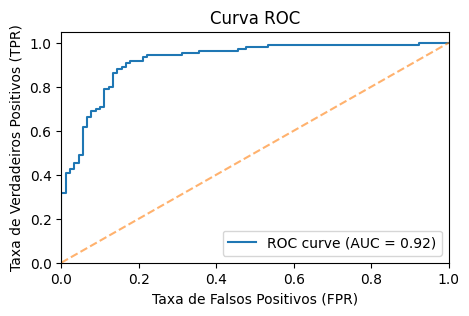

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Sample
X, y = make_classification(n_samples=1000, n_features=20, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LogisticRegression()
clf.fit(X_train, y_train)

# No lugar de prever as classes vamos obter as probabilidade da classe positiva (classe 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Cálculo da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Cálculo da área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

plt.legend()
plt.show()


In [9]:
thresholds[0] = 0
thresholds[-1] = 1
display(pd.DataFrame(zip(fpr, tpr, thresholds), columns=['fpr', 'tpr', 'threshold']).head())
display(pd.DataFrame(zip(fpr, tpr, thresholds), columns=['fpr', 'tpr', 'threshold']).tail())

,fpr,tpr,threshold
0,0.000000,0.000000,0.000000
1,0.000000,0.009091,0.999515
2,0.000000,0.318182,0.941021
3,0.011111,0.318182,0.935968
4,0.011111,0.409091,0.913785


,fpr,tpr,threshold
47,0.533333,0.981818,0.094788
48,0.533333,0.990909,0.093089
49,0.922222,0.990909,0.008159
50,0.922222,1.000000,0.007982
51,1.000000,1.000000,1.000000


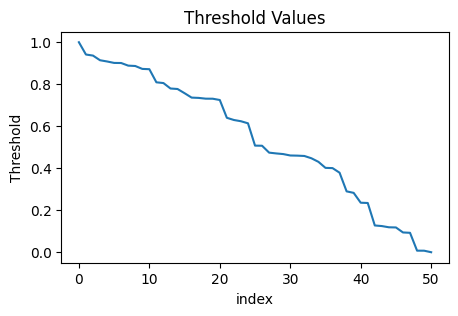

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(thresholds[1::]) # há um único valor > 1 para garantir todos os valores

plt.xlabel('index')
plt.ylabel('Threshold')
plt.title('Threshold Values')
plt.show()

## Qual o TPR e FPR para o threshold padrão?

In [ ]:
np.argmax(thresholds <= 0.5) # o índice do maior elemento <= 0.5

28

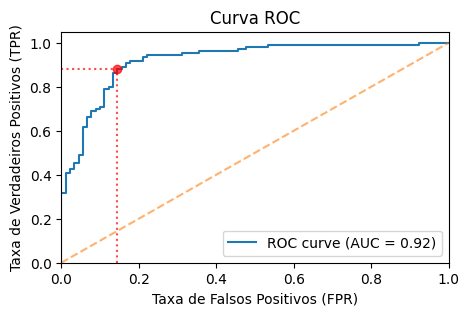

In [ ]:
prob = 0.5

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr,  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.6)

plt.hlines(tpr[ np.argmax(thresholds <= prob) ],0,fpr[ np.argmax(thresholds <= prob) ],color='r',linestyles='dotted', alpha=0.7)
plt.vlines(fpr[ np.argmax(thresholds <= prob) ],0,tpr[ np.argmax(thresholds <= prob) ],color='r',linestyles='dotted', alpha=0.7)
plt.plot(fpr[ np.argmax(thresholds <= prob) ],tpr[ np.argmax(thresholds <= prob) ],'ro', alpha=0.7)

plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

plt.legend()
plt.show()

# Comparando Modelos

A área sobre a curva ROC (AUC, Area Under Curve) é uma métrica bastante útil para comparar modelos de classificação binária sendo, AUC=1 um modelo com 100% de acerto e AUC=0, nenhum acerto. O baseline, entretanto, corresponde a diagonal com área 0.5, que corresponde a uma classificação aleatória de duas classses (50% de acerto).

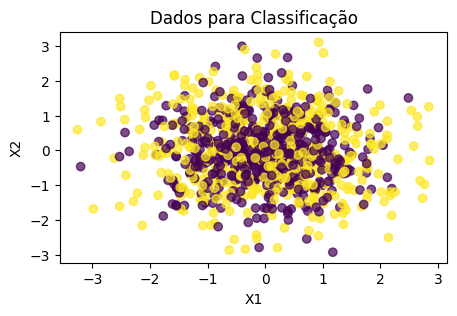

In [ ]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=1000, n_features=20, n_classes=2, random_state=1)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados para Classificação')
plt.show()


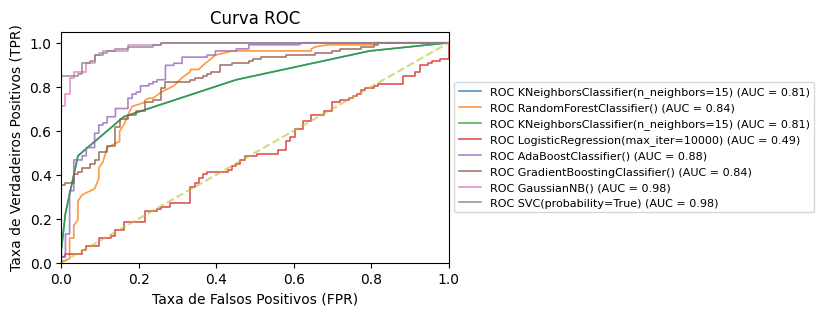

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

plt.figure(figsize=(5, 3))

base_estimators = [ KNeighborsClassifier(15),
#                    DecisionTreeClassifier(criterion='entropy'),
                    RandomForestClassifier(),
                    KNeighborsClassifier(15),
                    LogisticRegression(max_iter=10000),
                    AdaBoostClassifier(),
                    GradientBoostingClassifier(),
                    GaussianNB(),
                    SVC(probability=True),
                    ]

for clf in base_estimators:

  clf.fit(X_train, y_train)

  # No lugar de prever as classes vamos obter as probabilidade da classe positiva (classe 1)
  y_prob = clf.predict_proba(X_test)[:, 1]

  # Cálculo da curva ROC
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  # Cálculo da área sob a curva ROC (AUC)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'ROC {clf} (AUC = {roc_auc:.2f})', alpha=0.8,lw=1.2)

plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

plt.legend(fontsize=8,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


A AUC pode ser interpretada como a probabilidade de o modelo classificar corretamente cada instância como um exemplo positivo aleatório, sendo a área a probabilidade acumulada.

# Limitações

Infelizmente a curva ROC está limitada a análise de classificadores binários. Apesar disso você pode querer acessar [Multiclass Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) para o emprego da análise de modelos multiclasse.

![imagem](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_003.png)